In [56]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import nltk 
import re
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans




In [34]:
train_data_path=r"C:\Users\mwael\OneDrive\Desktop\home\course\kaggel\kaggeldata\movie_train_data.txt"
train_data=pd.read_csv(train_data_path,sep=":::",names=["Movie_name","Gener","Description"],engine="python")

In [35]:
train_data.head(10)

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [36]:
train_data.isnull().sum()

Movie_name     0
Gener          0
Description    0
dtype: int64

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_name   54214 non-null  object
 1   Gener        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [38]:
train_data.describe()

,Movie_name,Gener,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [39]:
test_data_path=r"C:\Users\mwael\OneDrive\Desktop\home\course\kaggel\kaggeldata\movie_test_data.txt"
test_data=pd.read_csv(train_data_path,sep=":::",names=["Movie_name","Gener","Description"],engine="python")

In [40]:
test_data.head(10)

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_name   54214 non-null  object
 1   Gener        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [42]:
test_data.isnull().sum()

Movie_name     0
Gener          0
Description    0
dtype: int64

In [43]:
test_data.describe()

,Movie_name,Gener,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


Text(0.5, 1.0, 'Gener distripution')

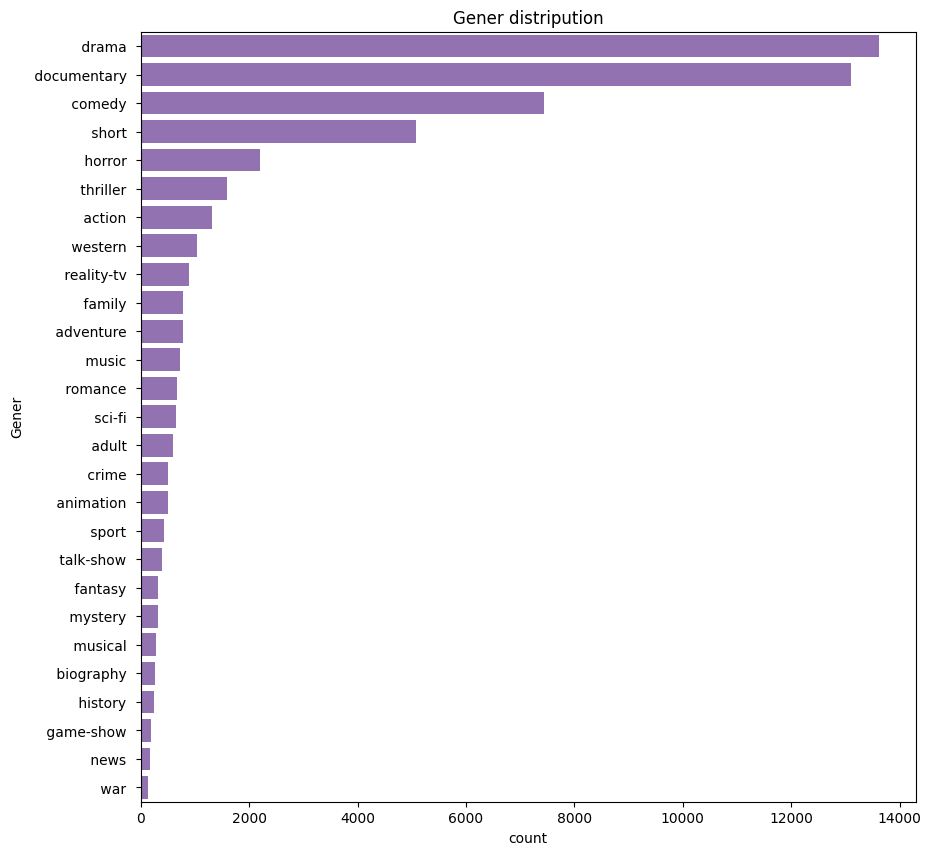

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(data=train_data,order= train_data["Gener"].value_counts().index,y="Gener",color="#9467bd")
plt.title("Gener distripution")

In [53]:
train_data['Gener'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [45]:
stop_words=stopwords.words("english")
import string
import nltk

# nltk.download('stopwords')
# nltk.download('punkt') 
# maybe need to download punkt and stopwords if not downloaded before

def text_preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    text = " ".join([word for word in words if word not in stop_words and len(word) > 2])
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text
train_data['clean_description']=train_data['Description'].apply(text_preprocessing)    
test_data['clean_description']=test_data['Description'].apply(text_preprocessing)    

In [46]:
train_data.head()

,Movie_name,Gener,Description,clean_description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...


In [47]:
test_data.head()

,Movie_name,Gener,Description,clean_description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...


In [48]:
vect=TfidfVectorizer()
x_train=vect.fit_transform(train_data['clean_description'])
x_test=vect.transform(test_data['clean_description'])


In [49]:
x=x_train
y=train_data['Gener']
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [57]:
km=KMeans(n_clusters=3,random_state=42)
km.fit(x) 

KMeans(n_clusters=3, random_state=42)

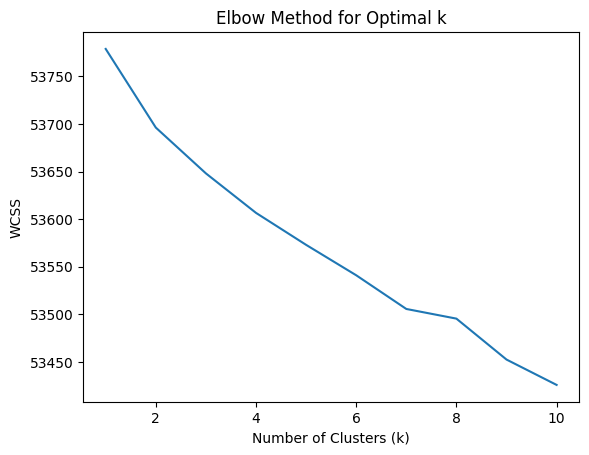

In [63]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [50]:
# model=RandomForestClassifier(n_estimators=100)
# model.fit(x_train,y_train)

In [51]:
# model.score(x_train, y_train) 

In [52]:
# from sklearn.metrics import  accuracy_score
# ypre=model.predict(x_test)
# accuracy_score=accuracy_score(y_test,ypre)
# print("accuracy score:",accuracy_score*100,"%")